In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

earth_density    = 5.51   # [g/cm**3]

In [2]:
dataEA = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\Exoplanet_Archive.csv",delimiter=",")
dataLI = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\STPM_improved_210721.csv",delimiter=",")
planet_name_LI        = list(dataLI["Star"]+" "+dataLI["Planet"])

In [3]:
# Luque Impoved
planet_id_LI         = dataLI.ID
star_name_LI         = dataLI.Star
planet_letter_LI     = dataLI.Planet

radius_LI            = dataLI.R_Rterra            # [Earth Radius]
radius_unc_up_LI     = dataLI.euR_Rterra          # [Earth Radius] Upper Unc.
radius_unc_low_LI    = dataLI.edR_Rterra          # [Earth Radius] Lower Unc.

mass_LI              = dataLI.M_Mterra            # [Earth Mass] - Planet Mass or Mass*sin(i) [Earth Mass]
mass_unc_up_LI       = dataLI.euM_Mterra          # [Earth Mass] Upper Unc.
mass_unc_low_LI      = dataLI.edM_Mterra          # [Earth Mass] Lower Unc.

density_LI           = dataLI[dataLI.columns[32]]  # [g/cm**3]
density_unc_up_LI    = dataLI[dataLI.columns[33]]  # [g/cm**3] Planet Density Upper Unc. 
density_unc_low_LI   = dataLI[dataLI.columns[34]]  # [g/cm**3] Planet Density Lower Unc

pl_eq_LI             = dataLI.Teq_K                # [K] Equilibrium Temperature

# Exoplanet Archive
planet_name_EA       = dataEA.pl_name
planet_id_EA         = list(range(0,len(planet_name_EA)))

radius_EA            = dataEA.pl_rade            # [Earth Radius]
period_EA            = dataEA.pl_orbper          # [days]
radius_unc_up_EA     = dataEA.pl_radeerr1        # [Earth Radius] Upper Unc.
radius_unc_low_EA    = dataEA.pl_radeerr2        # [Earth Radius] Lower Unc.
mass_EA              = dataEA.pl_bmasse          # [Earth Mass] - Planet Mass or Mass*sin(i) [Earth Mass]

mass_unc_up_EA       = dataEA.pl_bmasseerr1      # [Earth Mass] Upper Unc.
mass_unc_low_EA      = dataEA.pl_bmasseerr2      # [Earth Mass] Lower Unc.

density_EA           = dataEA.pl_dens            # [g/cm**3]
density_unc_up_EA    = dataEA.pl_denserr1        # [g/cm**3] Planet Density Upper Unc. 
density_unc_low_EA   = dataEA.pl_denserr2        # [g/cm**3] Planet Density Lower Unc. 
st_spectype_EA       = dataEA.st_spectype        # Spectral type of star
pl_eq_EA             = dataEA.pl_eqt             # [K] Equilibrium Temperature

for i in range(0,len(planet_name_LI)):
    if planet_name_LI[i] == 'CD-60 8051 b':
        planet_name_LI[i] = 'L 168-9 b'
    if planet_name_LI[i] == 'GJ 3053 b':
        planet_name_LI[i] = 'LHS 1140 b'
    if planet_name_LI[i] == 'GJ 3053 c':
        planet_name_LI[i] = 'LHS 1140 c'

##### Use the Luque values for planets in that sample #### 
for i in range(0,len(planet_name_EA)):
    if planet_name_EA[i] in planet_name_LI:
        LI_index              = planet_name_LI.index(planet_name_EA[i])
        
        pl_eq_EA[i]           = pl_eq_LI[LI_index]
        mass_EA[i]            = mass_LI[LI_index]
        mass_unc_up_EA[i]     = mass_unc_up_LI[LI_index]
        mass_unc_low_EA[i]    = mass_unc_low_LI[LI_index]
        
        radius_EA[i]          = radius_LI[LI_index]
        radius_unc_up_EA[i]   = radius_unc_up_LI[LI_index]      
        radius_unc_low_EA[i]  = radius_unc_low_LI[LI_index]    

        density_EA[i]         = density_LI[LI_index]  
        density_unc_up_EA[i]  = density_unc_up_LI[LI_index]  
        density_unc_low_EA[i] = density_unc_low_LI[LI_index] 
        st_spectype_EA[i]     = "M"

# Filters

### Base 1 /w and /wo unc

In [4]:
def filter_planets(planet_name_list,rel_unc_mass_criteria,rel_unc_density_criteria,star_type):
    EA_planets = []
    for i in range(0,len(planet_name_list)):
        if radius_EA[i]<4 and isinstance(st_spectype_EA[i],str) and star_type in st_spectype_EA[i]:
            relative_uncertainty_mass    = (mass_unc_up_EA[i] - mass_unc_low_EA[i]) / (2 * mass_EA[i])
            relative_uncertainty_density = (density_unc_up_EA[i] - density_unc_low_EA[i]) / (2 * density_EA[i])
            if relative_uncertainty_mass < rel_unc_mass_criteria and relative_uncertainty_density < rel_unc_density_criteria:
                EA_planets.append(planet_name_list[i])
    if rel_unc_mass_criteria > 0.06 and rel_unc_density_criteria > 0.06 and "M" in star_type:
    #### Adding the TRAPPIST-1 planets  ##### (biggest rel_err around 6%)
        EA_add_index = [5209,5210,5211,5212,5213,5214,5215] # adding the Trappist Planets
        for i in EA_add_index:
            EA_planets.append(planet_name_EA[i])
    return EA_planets

def filter_planets_no_unc(planet_name_list,star_type):
    EA_planets = []
    for i in range(0,len(planet_name_list)):
        if radius_EA[i]<4 and isinstance(st_spectype_EA[i],str) and star_type in st_spectype_EA[i]:
            EA_planets.append(planet_name_list[i])
    if "M" in star_type:
    #### Adding the TRAPPIST-1 planets  ##### (biggest rel_err around 6%)
        EA_add_index = [5209,5210,5211,5212,5213,5214,5215] # adding the Trappist Planets
        for i in EA_add_index:
            EA_planets.append(planet_name_EA[i])
    return EA_planets

### Choose LIV34

In [5]:
def liv34(EA_planets):
    LIV34_planets = ["K2-146 b",'TRAPPIST-1 h', 'TRAPPIST-1 d', 'TRAPPIST-1 e', 'TRAPPIST-1 f', 'TRAPPIST-1 g', 'TRAPPIST-1 c', 'TRAPPIST-1 b', 'GJ 1132 b', 'TOI-270 b', 'LHS 1140 c', 'GJ 1252 b', 'GJ 357 b', 'LTT 3780 b', 'LHS 1478 b', 'GJ 486 b', 'GJ 3473 b', 'L 168-9 b', 'L 98-59 c', 'L 98-59 d', 'LHS 1140 b', 'TOI-270 d', 'TOI-776 b', 'TOI-1634 b', 'TOI-1685 b', 'TOI-1235 b', 'K2-146 c', 'LTT 3780 c', 'TOI-270 c', 'K2-18 b', 'TOI-269 b', 'GJ 1214 b', 'K2-25 b', 'TOI-1231 b'] 
    planet      = [];planet_i       = []; planet_eq   = []
    radius      = []; radius_up     = []; radius_low  = []
    mass        = [];  mass_up      = []; mass_low    = []
    density     = []; density_up    = []; density_low = []
    
    for i in range(0,len(EA_planets)):
        if EA_planets[i] in LIV34_planets:
            index  = list(planet_name_EA).index(EA_planets[i]); planet.append(dataEA.pl_name[index])
            planet_eq.append(pl_eq_EA[i])
            radius.append(dataEA.pl_rade[index]); radius_up.append(dataEA.pl_radeerr1[index]); radius_low.append(dataEA.pl_radeerr2[index])
            density.append(dataEA.pl_dens[index]); density_up.append(dataEA.pl_denserr1[index]); density_low.append(dataEA.pl_denserr2[index])
            mass.append(dataEA.pl_bmasse[index]); mass_up.append(dataEA.pl_bmasseerr1[index]);  mass_low.append(dataEA.pl_bmasseerr2[index])
    return index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low,planet_eq

### Makelist

In [6]:
def make_lists(EA_planets):
    planet      = [];planet_i       = []; planet_eq   = []
    radius      = []; radius_up     = []; radius_low  = []
    mass        = [];  mass_up      = []; mass_low    = []
    density     = []; density_up    = []; density_low = []

    for i in range(0,len(EA_planets)):
        index  = list(planet_name_EA).index(EA_planets[i]); planet.append(dataEA.pl_name[index])
        planet_eq.append(pl_eq_EA[i])
        radius.append(dataEA.pl_rade[index]); radius_up.append(dataEA.pl_radeerr1[index]); radius_low.append(dataEA.pl_radeerr2[index])
        density.append(dataEA.pl_dens[index]); density_up.append(dataEA.pl_denserr1[index]); density_low.append(dataEA.pl_denserr2[index])
        mass.append(dataEA.pl_bmasse[index]); mass_up.append(dataEA.pl_bmasseerr1[index]);  mass_low.append(dataEA.pl_bmasseerr2[index])
    return index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low,planet_eq

def find_planet_index(name):
    return (list(EA_planets).index(name))

# Plot LIV34

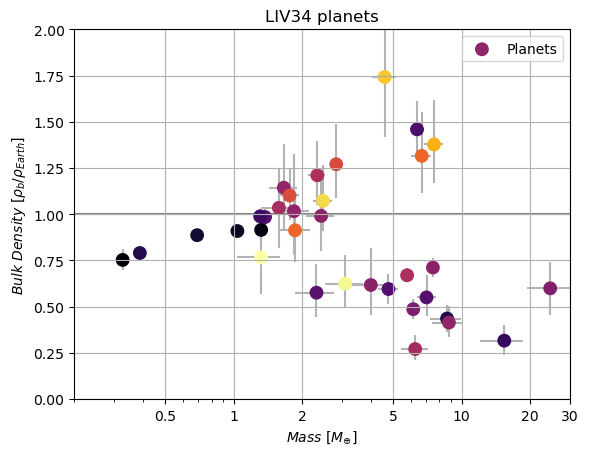

In [54]:
### Find LIV34 planets ###
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low,planet_eq = liv34(planet_name_EA)

mass_err        = [np.abs(mass_low),mass_up]
density_err     = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]

plt.errorbar(mass,np.divide(density,earth_density),xerr = mass_err, yerr=density_err,fmt='.', color='0.7',zorder=-32)
plt.scatter(mass,np.divide(density,earth_density), label = "Planets",s= 80,c=planet_eq, cmap = "inferno",marker='o')

plt.title('LIV34 planets')
plt.xlabel("$Mass\ [M_{\oplus}]$"); plt.ylabel("$Bulk\ Density\ [ρ_{b}/ρ_{Earth}]$"); plt.xscale("log");
plt.ylim(0,2); plt.xlim(0.2,30); plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False); plt.grid(); plt.hlines(1,0,30,"grey",zorder = -30); 
leg = plt.legend()
for line in leg.get_lines():
    line.set_linewidth(8.0)

In [1]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming you have error values for x and y coordinates for both datasets
x_err1 = [np.abs(mass_low), mass_up]
y_err1 = [np.divide(np.abs(density_low), earth_density), np.divide(density_up, earth_density)]

x_err2 = [np.abs(mass_low2), mass_up2]
y_err2 = [np.divide(np.abs(density_low2), earth_density), np.divide(density_up2, earth_density)]

# Create subplots with 2 rows and 1 column
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)

hover_text1 = [
    f"Dataset: Mass<br>Planet name: {planet[i]}<br>Mass: {mass1[i]} +{error_x_up_rounded1[i]} -{error_x_low_rounded1[i]}<br>Density: {density_rounded1[i]} +{error_y_up_rounded1[i]} -{error_y_low_rounded1[i]}"
    for i in range(len(mass1))
]

# Scatter plot for the first dataset
scatter1 = go.Scatter(
    x=mass1,
    y=np.divide(density1, earth_density),
    mode='markers',
    text=hover_text1,
    marker=dict(size=10, color=planet_eq1, colorscale='inferno'),
    error_x=dict(type='data', array=x_err1[0], arrayminus=x_err1[1], visible=True),
    error_y=dict(type='data', array=y_err1[0], arrayminus=y_err1[1], visible=True),
    name='Dataset 1'
)

hover_text2 = [
    f"Dataset: Mass2<br>Planet name: {planet[i]}<br>Mass: {mass2[i]} +{error_x_up_rounded2[i]} -{error_x_low_rounded2[i]}<br>Density: {density_rounded2[i]} +{error_y_up_rounded2[i]} -{error_y_low_rounded2[i]}"
    for i in range(len(mass2))
]

# Scatter plot for the second dataset
scatter2 = go.Scatter(
    x=mass2,
    y=np.divide(density2, earth_density),
    mode='markers',
    text=hover_text2,
    marker=dict(size=10, color=planet_eq2, colorscale='inferno'),
    error_x=dict(type='data', array=x_err2[0], arrayminus=x_err2[1], visible=True),
    error_y=dict(type='data', array=y_err2[0], arrayminus=y_err2[1], visible=True),
    name='Dataset 2'
)

# Add the first dataset plot to the first row
fig.add_trace(scatter1, row=1, col=1)

# Add the second dataset plot to the second row
fig.add_trace(scatter2, row=2, col=1)
buttons = [
    {
        'method': 'restyle',
        'label': 'Data 1',
        'args': [{'x': [mass], 'y': [np.divide(density, earth_density)], 'marker.color': [planet_eq]}]
    },
    {
        'method': 'restyle',
        'label': 'Data 2',
        'args': [{'x': [mass2], 'y': [np.divide(density2, earth_density)], 'marker.color': [planet_eq2]}]
    },
    {
        'method': 'restyle',
        'label': 'Both Data',
        'args': [{'x': [mass, mass2], 'y': [np.divide(density, earth_density), np.divide(density2, earth_density)],
                  'marker.color': [planet_eq, planet_eq2]}]
    }
]
# Update layout
fig.update_layout(
    updatemenus=[
        {
            'buttons': buttons,
            'direction': 'down',
            'showactive': True,
            'x': 0.1,
            'xanchor': 'left',
            'y': 1.15,
            'yanchor': 'top'
        },
    ],
    title='Interactive 2D Plot with Error Bars and Colormap',
    xaxis=dict(
        title='Mass',
        type='log',  # Log scale the x-axis
        tickvals=[0.5, 1, 2, 5, 10, 20, 30],  # Custom tick positions
        ticktext=["0.5", "1", "2", "5", "10", "20", "30"],  # Custom tick labels
        dtick=1  # Spacing between ticks
    ),
    yaxis=dict(title='Density'),
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    ),
    width=800,  # Adjust the width of the figure
    height=600  # Adjust the height of the figure
)


fig.show()



NameError: name 'np' is not defined

In [57]:
import plotly.graph_objects as go

# Assuming you have error values for x and y coordinates for both datasets
x_err = [np.abs(mass_low), mass_up]
y_err = [np.divide(np.abs(density_low), earth_density), np.divide(density_up, earth_density)]

x_err2 = [np.abs(mass_low2), mass_up2]
y_err2 = [np.divide(np.abs(density_low2), earth_density), np.divide(density_up2, earth_density)]

# Merge the data from both datasets
merged_mass = mass.append(mass2)
merged_density = np.append(np.divide(density, earth_density),(np.divide(density2, earth_density)))
merged_density_low = density_low.append(density_low2)
merged_density_up = density_up.append(density_up2)
merged_planet = planet.append(planet2)
merged_planet_eq = planet_eq.append(planet_eq2)
merged_dataset = ['Dataset 1'] * len(mass) + ['Dataset 2'] * len(mass2)

# Create hover text with desired information for both datasets
hover_text = [
    f"Dataset: {merged_dataset[i]}<br>Planet name: {merged_planet[i]}<br>Mass: {merged_mass[i]}<br>Density: {merged_density[i]}<br>Density Low: {merged_density_low[i]}<br>Density Up: {merged_density_up[i]}"
    for i in range(len(merged_mass))
]

# Create the scatter plot with colormap
scatter = go.Scatter(
    x=merged_mass,
    y=merged_density,
    mode='markers',
    text=hover_text,
    marker=dict(size=10, color=merged_planet_eq, colorscale='inferno'),
    error_x=dict(type='data', array=x_err[0] + x_err2[0], arrayminus=x_err1[1] + x_err2[1], visible=True),
    error_y=dict(type='data', array=y_err[0] + y_err2[0], arrayminus=y_err1[1] + y_err2[1], visible=True),
    name='Merged Data'
)

# Create the figure
fig = go.Figure(scatter)

buttons = [
    {
        'method': 'restyle',
        'label': 'Data 1',
        'args': [{'x': [mass], 'y': [np.divide(density, earth_density)], 'marker.color': [planet_eq]}]
    },
    {
        'method': 'restyle',
        'label': 'Data 2',
        'args': [{'x': [mass2], 'y': [np.divide(density2, earth_density)], 'marker.color': [planet_eq2]}]
    },
    {
        'method': 'restyle',
        'label': 'Both Data',
        'args': [{'x': [merged_mass], 'y': [merged_density], 'marker.color': [merged_planet_eq]}]
    }
]

# Update layout
fig.update_layout(
    updatemenus=[
        {
            'buttons': buttons,
            'direction': 'down',
            'showactive': True,
            'x': 0.1,
            'xanchor': 'left',
            'y': 1.15,
            'yanchor': 'top'
        },
    ],
    title='Interactive 2D Plot with Error Bars and Colormap',
    xaxis=dict(
        title='Mass',
        type='log',  # Log scale the x-axis
        tickvals=[0.5, 1, 2, 5, 10, 20, 30],  # Custom tick positions
        ticktext=["0.5", "1", "2", "5", "10", "20", "30"],  # Custom tick labels
        dtick=1  # Spacing between ticks
    ),
    yaxis=dict(title='Density'),
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    ),
    width=800,  # Adjust the width of the figure
    height=600  # Adjust the height of the figure
)

fig.show()


NameError: name 'planet2' is not defined

In [50]:
np.divide(density,earth_density)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (35,) + inhomogeneous part.

In [53]:
density

[6.3,
 1.49,
 4.22,
 5.03,
 5.6,
 7.0,
 3.69,
 3.92,
 2.4,
 3.3,
 9.6,
 5.46,
 3.17,
 8.04,
 6.07,
 6.67,
 5.91,
 3.03,
 1.74,
 7.25,
 7.59,
 3.44,
 2.28,
 5.7,
 2.68,
 3.28,
 3.4,
 5.425,
 5.447,
 4.354,
 4.885,
 5.009,
 5.042,
 4.147,
 [10.2,
  6.2,
  4.7,
  3.7,
  2.98,
  3.02,
  6.1,
  1.36,
  1.26,
  1.61,
  1.45,
  6.74,
  7.1,
  5.57,
  2.45,
  5.4,
  3.1,
  3.86,
  1.91,
  3.5]]

In [32]:
import plotly.graph_objects as go
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low,planet_eq = liv34(planet_name_EA)
# Assuming you have error values for x and y coordinates in the format [low_error, up_error]
x_err = [np.abs(mass_low),mass_up]
y_err = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]

# Split the error values into low and high errors for x and y
error_x_low = [low_x for low_x, _ in zip(x_err[0], x_err[1])]
error_x_up = [up_x for _, up_x in zip(x_err[0], x_err[1])]
error_y_low = [low_y for low_y, _ in zip(y_err[0], y_err[1])]
error_y_up = [up_y for _, up_y in zip(y_err[0], y_err[1])]


# Round errors to 2 decimal places
error_x_low_rounded = [round(error, 2) for error in error_x_low]
error_x_up_rounded = [round(error, 2) for error in error_x_up]
error_y_low_rounded = [round(error, 2) for error in error_y_low]
error_y_up_rounded = [round(error, 2) for error in error_y_up]
density_rounded = [round(dens, 2) for dens in np.divide(density, earth_density)]

EA_planets = filter_planets(planet_name_EA,0.20,0.20,"M")
_,planet2,radius2,_,_,density2,density_up2,density_low2,mass2,mass_up2,mass_low2,planet_eq2 = make_list(EA_planets)

x_err2 = [np.abs(mass_low2), mass_up2]
y_err2 = [np.divide(np.abs(density_low2), earth_density), np.divide(density_up2, earth_density)]

# Split the error values into low and high errors for x and y
error_x_low2 = [low_x for low_x, _ in zip(x_err2[0], x_err2[1])]
error_x_up2 = [up_x for _, up_x in zip(x_err2[0], x_err2[1])]
error_y_low2 = [low_y for low_y, _ in zip(y_err2[0], y_err2[1])]
error_y_up2 = [up_y for _, up_y in zip(y_err2[0], y_err2[1])]

# For Data 2
error_x_low_rounded2 = [round(error, 2) for error in error_x_low2]
error_x_up_rounded2 = [round(error, 2) for error in error_x_up2]
error_y_low_rounded2 = [round(error, 2) for error in error_y_low2]
error_y_up_rounded2 = [round(error, 2) for error in error_y_up2]
density_rounded2 = [round(dens, 2) for dens in density2]

# Scatter plot
fig.add_trace(
    go.Scatter(
        x=mass,
        y=np.divide(density, earth_density),
        mode='markers',
        text=hover_text,
        marker=dict(size=10, color=planet_eq, colorscale='inferno'),
        error_x=dict(type='data', array=error_x_low, arrayminus=error_x_up, visible=True),
        error_y=dict(type='data', array=error_y_low, arrayminus=error_y_up, visible=True),
        name='Data'
    )

)
fig.update_layout(
    title='LIV34 Planets',
    xaxis=dict(
        title='$Mass\ [M_{\oplus}]$',
        type='log',  # Log scale the x-axis
        tickvals=[0.3,0.5, 1, 2, 5, 10, 20, 30],  # Custom tick positions
        ticktext=["0.3","0.5", "1", "2", "5", "10", "20", "30"],  # Custom tick labels
        dtick=1  # Spacing between ticks 
    ),
    yaxis=dict(title='$Bulk\ Density\ [ρ_{b}/ρ_{Earth}]$'),
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    ),
    width=1000,  # Adjust the width of the figure
    height=700  # Adjust the height of the figure
)
fig.show()


In [20]:
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low,planet_eq = liv34(planet_name_EA)
EA_planets = filter_planets(planet_name_EA,0.20,0.20,"M")
indexs,planets,radiuss,radius_ups,radius_lows,densitys,density_ups,density_lows,masss,mass_ups,mass_lows,planet_eqs = make_lists(EA_planets)
mass_err2         = [np.abs(mass_lows),mass_ups]
density_err2      = [np.divide(np.abs(density_lows),earth_density),np.divide(density_ups,earth_density)]
mass2 = []; mass_low2 = []; mass_up2 = []
density2 = []; density_up2 = []; density_low2 = []; 
radius2= []
planets_adding   = []
planet_eq2 = []
for i in range(0,len(planets)):
    if planets[i] not in planet:
        planets_adding.append(planets[i])
        mass2.append(masss[i])
        radius2.append(radiuss[i])
        mass_low2.append(mass_lows[i])
        mass_up2.append(mass_ups[i])
        density2.append(densitys[i])
        density_low2.append(density_lows[i])
        density_up2.append(density_ups[i])
        planet_eq2.append(planet_eqs[i])
        

density_low2 = np.divide(np.abs(density_low2),earth_density); density_up2 = np.divide(density_up2,earth_density)

In [29]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming you have error values for x and y coordinates for both datasets
x_err1 = [np.abs(mass_low), mass_up]
y_err1 = [np.divide(np.abs(density_low), earth_density), np.divide(density_up, earth_density)]
x_err2 = [np.abs(mass_low2), mass_up2]
y_err2 = [np.divide(np.abs(density_low2), earth_density), np.divide(density_up2, earth_density)]

# Split the error values into low and high errors for x and y for both datasets
error_x_low1, error_x_up1 = x_err1
error_y_low1, error_y_up1 = y_err1
error_x_low2, error_x_up2 = x_err2
error_y_low2, error_y_up2 = y_err2

# Round errors and density to 2 decimal places for both datasets
# For Data 1
error_x_low_rounded1 = [round(error, 2) for error in error_x_low1]
error_x_up_rounded1 = [round(error, 2) for error in error_x_up1]
error_y_low_rounded1 = [round(error, 2) for error in error_y_low1]
error_y_up_rounded1 = [round(error, 2) for error in error_y_up1]
density_rounded1 = [round(dens, 2) for dens in density]

# For Data 2
error_x_low_rounded2 = [round(error, 2) for error in error_x_low2]
error_x_up_rounded2 = [round(error, 2) for error in error_x_up2]
error_y_low_rounded2 = [round(error, 2) for error in error_y_low2]
error_y_up_rounded2 = [round(error, 2) for error in error_y_up2]
density_rounded2 = [round(dens, 2) for dens in density2]

# Create hover text with desired information for both datasets
hover_text1 = [
    f"Dataset: Mass<br>Planet name: {planet[i]}<br>Mass: {mass1[i]} +{error_x_up_rounded1[i]} -{error_x_low_rounded1[i]}<br>Density: {density_rounded1[i]} +{error_y_up_rounded1[i]} -{error_y_low_rounded1[i]}"
    for i in range(len(mass1))
]

hover_text2 = [
    f"Dataset: Mass2<br>Planet name: {planet[i]}<br>Mass: {mass2[i]} +{error_x_up_rounded2[i]} -{error_x_low_rounded2[i]}<br>Density: {density_rounded2[i]} +{error_y_up_rounded2[i]} -{error_y_low_rounded2[i]}"
    for i in range(len(mass2))
]

# Create subplots
fig = make_subplots(rows=1, cols=1)

# Scatter plot with colormap for the first dataset
scatter1 = go.Scatter(
    x=mass1,
    y=np.divide(density1, earth_density),
    mode='markers',
    text=hover_text1,  # Use the custom hover text for Data 1
    marker=dict(size=10, color=planet_eq1, colorscale='inferno'),
    error_x=dict(type='data', array=error_x_low_rounded1, arrayminus=error_x_up_rounded1, visible=True),
    error_y=dict(type='data', array=error_y_low_rounded1, arrayminus=error_y_up_rounded1, visible=True),
    name='Data 1'
)

# Scatter plot with colormap for the second dataset
scatter2 = go.Scatter(
    x=mass2,
    y=np.divide(density2, earth_density),
    mode='markers',
    text=hover_text2,  # Use the custom hover text for Data 2
    marker=dict(size=10, color=planet_eq2, colorscale='inferno'),
    error_x=dict(type='data', array=error_x_low_rounded2, arrayminus=error_x_up_rounded2, visible=True),
    error_y=dict(type='data', array=error_y_low_rounded2, arrayminus=error_y_up_rounded2, visible=True),
    name='Data 2'
)

# Add the first and second datasets to the plot
fig.add_trace(scatter1)
fig.add_trace(scatter2)


# Define buttons to toggle between datasets
buttons = [
    {
        'method': 'restyle',
        'label': 'Data 1',
        'args': [{'x': [mass1], 'y': [np.divide(density1, earth_density)], 'marker.color': [planet_eq1]}]
    },
    {
        'method': 'restyle',
        'label': 'Data 2',
        'args': [{'x': [mass2], 'y': [np.divide(density2, earth_density)], 'marker.color': [planet_eq2]}]
    },
    {
        'method': 'restyle',
        'label': 'Both Data',
        'args': [{'x': [mass1, mass2], 'y': [np.divide(density1, earth_density), np.divide(density2, earth_density)],
                  'marker.color': [planet_eq1, planet_eq2]}]
    }
]

# Create updatemenus dropdown
fig.update_layout(
    updatemenus=[
        {
            'buttons': buttons,
            'direction': 'down',
            'showactive': True,
            'x': 0.1,
            'xanchor': 'left',
            'y': 1.15,
            'yanchor': 'top'
        },
    ],
    title='Interactive 2D Plot with Error Bars and Colormap',
    xaxis=dict(
        title='Mass',
        type='log',  # Log scale the x-axis
        tickvals=[0.5, 1, 2, 5, 10, 20, 30],  # Custom tick positions
        ticktext=["0.5", "1", "2", "5", "10", "20", "30"],  # Custom tick labels
        dtick=1  # Spacing between ticks
    ),
    yaxis=dict(title='Density'),
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    ),
    width=800,  # Adjust the width of the figure
    height=600  # Adjust the height of the figure
)

fig.show()
